### Gaussian Processes Practical Demonstration
https://www.youtube.com/watch?v=V1bF37-_ytQ

In [39]:
# Support for maths
import numpy as np
# Plotting tools
from matplotlib import pyplot as plt
# we use the following for plotting figures in jupyter
%matplotlib inline
# Importing data library
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# GPy: Gaussian processess libary
import GPy
from IPython.display import display

In [40]:
# Pembacaan File Data Polusi Udara ISPU Excel
DKI1 = pd.read_excel("./Data/Normalization/DATA ISPU - Normalization.xlsx", sheet_name="DKI1")

In [41]:
# Menampilkan 5 Data pertama DKI1
DKI1

,Tanggal,Wilayah,PM10,SO2,CO,O3,NO2,Max,Critical,Kategori
0,2017-01-01,DKI1 (Bunderan HI),0.719512,0.314286,0.458333,0.092308,0.012821,0.300518,PM10,Sedang
1,2017-01-02,DKI1 (Bunderan HI),0.146341,0.295238,0.270833,0.082051,0.000000,0.139896,SO2,Baik
2,2017-01-03,DKI1 (Bunderan HI),0.170732,0.295238,0.291667,0.087179,0.012821,0.139896,SO2,Baik
3,2017-01-04,DKI1 (Bunderan HI),0.243902,0.295238,0.395833,0.087179,0.012821,0.139896,SO2,Baik
4,2017-01-05,DKI1 (Bunderan HI),0.304878,0.295238,0.458333,0.056410,0.012821,0.139896,SO2,Baik
...,...,...,...,...,...,...,...,...,...,...
1760,2021-10-27,DKI1 (Bunderan HI),0.621951,0.266667,0.250000,0.097436,0.487179,0.367876,PM25,SEDANG
1761,2021-10-28,DKI1 (Bunderan HI),0.573171,0.257143,0.270833,0.097436,0.487179,0.331606,PM25,SEDANG
1762,2021-10-29,DKI1 (Bunderan HI),0.560976,0.285714,0.333333,0.076923,0.435897,0.305699,PM25,SEDANG
1763,2021-10-30,DKI1 (Bunderan HI),0.536585,0.285714,0.187500,0.112821,0.500000,0.326425,PM25,SEDANG


Train Test Data

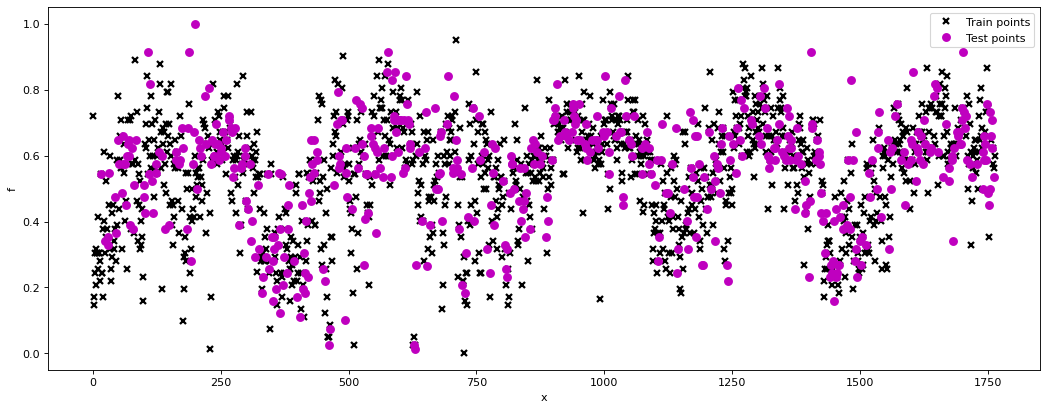

In [72]:
X = np.array(list(range(0,1765)))
# x = np.array(DKI1['Tanggal'])
X = X.reshape(-1,1)
Y = np.array(DKI1['PM10'])
Y = Y.reshape(-1,1)

from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=42, shuffle=True)

# Plot observations
plt.figure(figsize=(16, 6), dpi=80)
plt.plot(train_X, train_Y, "kx", mew=2, label='Train points')
plt.plot(test_X, test_Y, "mo", mew=2, label='Test points')

# Annotate plot
plt.xlabel("x"), plt.ylabel("f")
plt.legend()

#### RBF Kernel
Optimizing kernel parameters

In [73]:
k1 = GPy.kern.RBF(1)
m1 = GPy.models.GPRegression(train_X, train_Y, k1)
m1.optimize()

In [74]:
m1

GP_regression.,value,constraints,priors
rbf.variance,0.1814262409083218,+ve,
rbf.lengthscale,22.65008910977106,+ve,
Gaussian_noise.variance,0.015499245992651237,+ve,


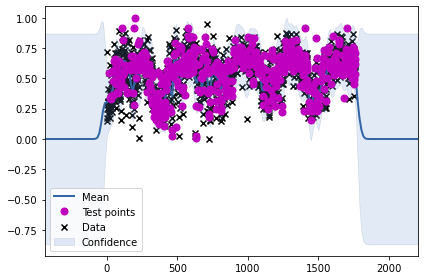

In [75]:
m1.plot()
ax = plt.gca()
# plt.figure(figsize=(32, 12), dpi=80)
ax.plot(test_X, test_Y, "mo", mew=2, label="Test points")

ax.legend()

In [76]:
from sklearn import metrics

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [77]:
print('Evaluation:\n_____________________________________')
print_evaluate(test_Y, m1.predict(test_X)[0].flatten())

Evaluation:
_____________________________________
MAE: 0.09744284784938247
MSE: 0.01660147484135901
RMSE: 0.12884671063461034
R2 Square 0.3920445328844183
__________________________________


Periodic kernel

In [19]:
k2 = GPy.kern.StdPeriodic(1, period=2)
m2 = GPy.models.GPRegression(X_train, y_train, k2)
m2.optimize()

In [21]:
m2

GP_regression.,value,constraints,priors
std_periodic.variance,1.1190441337603914,+ve,
std_periodic.period,1.9972923988244409,+ve,
std_periodic.lengthscale,0.3850213458953692,+ve,
Gaussian_noise.variance,0.021565126572192245,+ve,


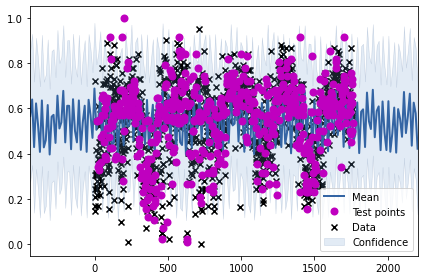

In [20]:
m2.plot()
ax = plt.gca()
ax.plot(X_test, y_test, "mo", mew=2, label='Test points')

ax.legend()

In [22]:
print('Evaluation:\n_____________________________________')
print_evaluate(y_test, m2.predict(X_test)[0].flatten())

Evaluation:
_____________________________________
MAE: 0.10968785287651363
MSE: 0.020712631224631187
RMSE: 0.14391883554500845
R2 Square 0.24149164386333422
__________________________________


Kombinasi 2 Kernel

In [23]:
k3 = k1+k2
k4 = k1*k2

In [25]:
m3 = GPy.models.GPRegression(X_train, y_train, k3)
m3.optimize()
m3

GP_regression.,value,constraints,priors
sum.rbf.variance,0.014232948280019512,+ve,
sum.rbf.lengthscale,8.479950401007585,+ve,
sum.std_periodic.variance,0.29502820557856463,+ve,
sum.std_periodic.period,2.1363624264538443,+ve,
sum.std_periodic.lengthscale,58.50219718593394,+ve,
Gaussian_noise.variance,0.013651342102513554,+ve,


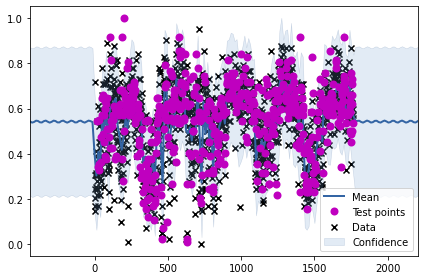

In [26]:
m3.plot()
ax = plt.gca()
ax.plot(X_test, y_test, "mo", mew=2, label='Test points')

ax.legend()

In [27]:
print('Evaluation:\n_____________________________________')
print_evaluate(y_test, m3.predict(X_test)[0].flatten())

Evaluation:
_____________________________________
MAE: 0.09465267274915175
MSE: 0.015623968781086402
RMSE: 0.12499587505628497
R2 Square 0.4278413617300594
__________________________________


In [28]:
m4 = GPy.models.GPRegression(X_train, y_train, k4)
m4.optimize()
m4

GP_regression.,value,constraints,priors
mul.rbf.variance,0.14816089201521956,+ve,
mul.rbf.lengthscale,22.68162830360128,+ve,
mul.std_periodic.variance,1.2257454957416598,+ve,
mul.std_periodic.period,3.5673864169509253,+ve,
mul.std_periodic.lengthscale,27.970503031496715,+ve,
Gaussian_noise.variance,0.015442724064367974,+ve,


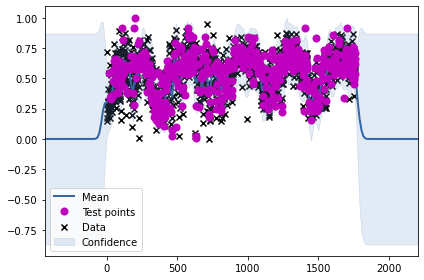

In [29]:
m4.plot()
ax = plt.gca()
ax.plot(X_test, y_test, "mo", mew=2, label='Test points')

ax.legend()

In [30]:
print('Evaluation:\n_____________________________________')
print_evaluate(y_test, m4.predict(X_test)[0].flatten())

Evaluation:
_____________________________________
MAE: 0.09755783219017619
MSE: 0.016637526814585593
RMSE: 0.1289865373385362
R2 Square 0.39072428908482515
__________________________________
